In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection
import seaborn as sns
from time import sleep
import plotly.express as px
import pandas as pd
from datetime import datetime, timedelta

import fastf1.plotting
import fastf1.livetiming
from fastf1.ergast import Ergast
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False)

In [2]:
year = 2024
location = "Spain"
session = 5

session = fastf1.get_session(year, location, session)
session.load(laps=True, telemetry=True, weather=False, messages=False, livedata=None)

req         WARNING 	DEFAULT CACHE ENABLED! (260.55 MB) C:\Users\lmfab\AppData\Local\Temp\fastf1


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [44]:
ergast = Ergast()
races = ergast.get_race_schedule(2024)
races.loc[:races.index[races["raceName"] == "Hungarian Grand Prix"][0]]

,season,round,raceUrl,raceName,raceDate,raceTime,circuitId,circuitUrl,circuitName,lat,...,fp1Date,fp1Time,fp2Date,fp2Time,fp3Date,fp3Time,qualifyingDate,qualifyingTime,sprintDate,sprintTime
0,2024,1,https://en.wikipedia.org/wiki/2024_Bahrain_Gra...,Bahrain Grand Prix,2024-03-02,15:00:00+00:00,bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...,Bahrain International Circuit,26.0325,...,2024-02-29,11:30:00+00:00,2024-02-29,15:00:00+00:00,2024-03-01,12:30:00+00:00,2024-03-01,16:00:00+00:00,NaT,NaN
1,2024,2,https://en.wikipedia.org/wiki/2024_Saudi_Arabi...,Saudi Arabian Grand Prix,2024-03-09,17:00:00+00:00,jeddah,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,Jeddah Corniche Circuit,21.6319,...,2024-03-07,13:30:00+00:00,2024-03-07,17:00:00+00:00,2024-03-08,13:30:00+00:00,2024-03-08,17:00:00+00:00,NaT,NaN
2,2024,3,https://en.wikipedia.org/wiki/2024_Australian_...,Australian Grand Prix,2024-03-24,04:00:00+00:00,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,...,2024-03-22,01:30:00+00:00,2024-03-22,05:00:00+00:00,2024-03-23,01:30:00+00:00,2024-03-23,05:00:00+00:00,NaT,NaN
3,2024,4,https://en.wikipedia.org/wiki/2024_Japanese_Gr...,Japanese Grand Prix,2024-04-07,05:00:00+00:00,suzuka,http://en.wikipedia.org/wiki/Suzuka_Circuit,Suzuka Circuit,34.8431,...,2024-04-05,02:30:00+00:00,2024-04-05,06:00:00+00:00,2024-04-06,02:30:00+00:00,2024-04-06,06:00:00+00:00,NaT,NaN
4,2024,5,https://en.wikipedia.org/wiki/2024_Chinese_Gra...,Chinese Grand Prix,2024-04-21,07:00:00+00:00,shanghai,http://en.wikipedia.org/wiki/Shanghai_Internat...,Shanghai International Circuit,31.3389,...,2024-04-19,03:30:00+00:00,2024-04-19,07:30:00+00:00,NaT,NaN,2024-04-20,07:00:00+00:00,2024-04-20,03:00:00+00:00
5,2024,6,https://en.wikipedia.org/wiki/2024_Miami_Grand...,Miami Grand Prix,2024-05-05,20:00:00+00:00,miami,http://en.wikipedia.org/wiki/Miami_Internation...,Miami International Autodrome,25.9581,...,2024-05-03,16:30:00+00:00,2024-05-03,20:30:00+00:00,NaT,NaN,2024-05-04,20:00:00+00:00,2024-05-04,16:00:00+00:00
6,2024,7,https://en.wikipedia.org/wiki/2024_Emilia_Roma...,Emilia Romagna Grand Prix,2024-05-19,13:00:00+00:00,imola,http://en.wikipedia.org/wiki/Autodromo_Enzo_e_...,Autodromo Enzo e Dino Ferrari,44.3439,...,2024-05-17,11:30:00+00:00,2024-05-17,15:00:00+00:00,2024-05-18,10:30:00+00:00,2024-05-18,14:00:00+00:00,NaT,NaN
7,2024,8,https://en.wikipedia.org/wiki/2024_Monaco_Gran...,Monaco Grand Prix,2024-05-26,13:00:00+00:00,monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,...,2024-05-24,11:30:00+00:00,2024-05-24,15:00:00+00:00,2024-05-25,10:30:00+00:00,2024-05-25,14:00:00+00:00,NaT,NaN
8,2024,9,https://en.wikipedia.org/wiki/2024_Canadian_Gr...,Canadian Grand Prix,2024-06-09,18:00:00+00:00,villeneuve,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,Circuit Gilles Villeneuve,45.5000,...,2024-06-07,17:30:00+00:00,2024-06-07,21:00:00+00:00,2024-06-08,16:30:00+00:00,2024-06-08,20:00:00+00:00,NaT,NaN
9,2024,10,https://en.wikipedia.org/wiki/2024_Spanish_Gra...,Spanish Grand Prix,2024-06-23,13:00:00+00:00,catalunya,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,Circuit de Barcelona-Catalunya,41.5700,...,2024-06-21,11:30:00+00:00,2024-06-21,15:00:00+00:00,2024-06-22,10:30:00+00:00,2024-06-22,14:00:00+00:00,NaT,NaN


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

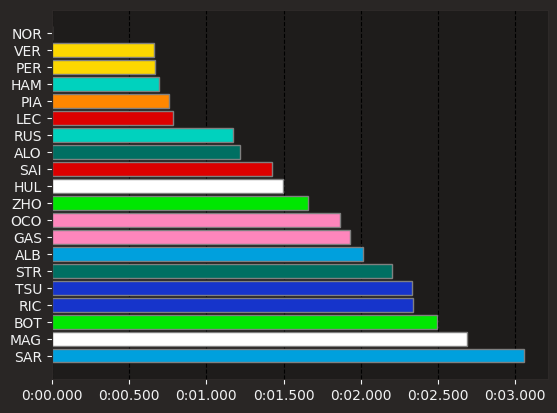

In [6]:
fastest_laps = []
for driver in session.drivers:
    fastest_laps.append(session.laps.pick_driver(driver).pick_fastest())

fastest_laps = fastf1.core.Laps(fastest_laps).sort_values(by="LapTime").reset_index(drop=True)
display(fastest_laps.columns)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, linestyle='--', color='black')

In [ ]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,1.0,,NaN,0 days 00:01:13.013000,0 days 00:01:11.742000,0 days 00:01:12,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,2.0,,NaN,0 days 00:01:12.360000,0 days 00:01:12.549000,0 days 00:01:12,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,,NaN,0 days 00:01:12.959000,0 days 00:01:12.201000,0 days 00:01:12.021000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,4.0,,NaN,0 days 00:01:12.907000,0 days 00:01:12.462000,0 days 00:01:12.103000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,RB,6692FF,rb,Daniel,Ricciardo,Daniel Ricciardo,...,AUS,5.0,,NaN,0 days 00:01:13.240000,0 days 00:01:12.572000,0 days 00:01:12.178000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,6.0,,NaN,0 days 00:01:13.117000,0 days 00:01:12.635000,0 days 00:01:12.228000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,7.0,,NaN,0 days 00:01:12.851000,0 days 00:01:11.979000,0 days 00:01:12.280000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,8.0,,NaN,0 days 00:01:12.748000,0 days 00:01:12.303000,0 days 00:01:12.414000,NaT,,NaN
18,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,9.0,,NaN,0 days 00:01:13.088000,0 days 00:01:12.659000,0 days 00:01:12.701000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,THA,10.0,,NaN,0 days 00:01:12.896000,0 days 00:01:12.485000,0 days 00:01:12.796000,NaT,,NaN


   Driver  Stint Compound  LapNumber
0     ALB    1.0   MEDIUM         18
1     ALB    2.0     SOFT         25
2     ALB    3.0     SOFT         22
3     ALO    1.0     SOFT         19
4     ALO    2.0   MEDIUM         26
..    ...    ...      ...        ...
57    VER    2.0   MEDIUM         27
58    VER    3.0     SOFT         22
59    ZHO    1.0     SOFT          9
60    ZHO    2.0   MEDIUM         32
61    ZHO    3.0     HARD         24

[62 rows x 4 columns]


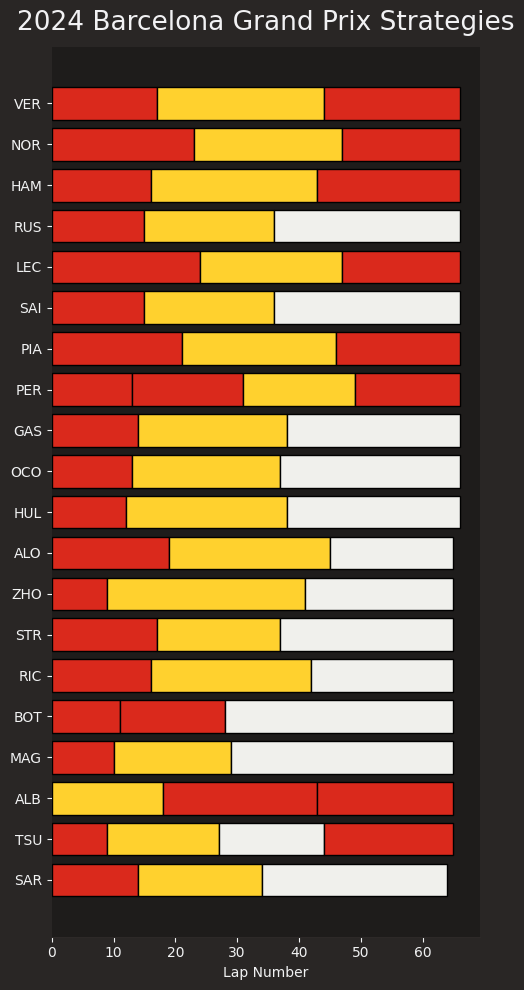

In [7]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in session.drivers]

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
print(stints)

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["LapNumber"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["LapNumber"]

plt.title(f"{year} {session.session_info['Meeting']['Location']} Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

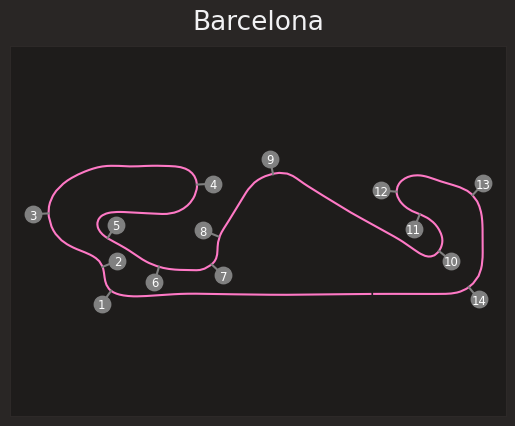

In [8]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

track = pos.loc[:, ('X', 'Y')].to_numpy()
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()